In [165]:
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns

#通过read_csv来读取我们的目的数据集
adv_data = pd.read_csv(r"D:\software_bag_X\MicrosoftVScodefiles\R1R21.csv")
#清洗不需要的数据
new_adv_data = adv_data
#得到我们所需要的数据集且查看其前几列以及数据形状
print('head:',new_adv_data.head(),'\nShape:',new_adv_data.shape)

head:          X1        X2   FAC1_1
0 -1.895833  0.024506 -0.73160
1 -2.090571  0.503143 -0.70241
2 -1.403541 -0.800466 -0.65993
3 -0.849346 -0.677680 -0.61505
4 -1.137142 -0.417024 -0.53156 
Shape: (12, 3)


              X1         X2     FAC1_1
count  12.000000  12.000000  12.000000
mean   -0.582772  -0.410733   0.238644
std     1.016526   0.486469   1.261944
min    -2.090571  -0.983302  -0.731600
25%    -1.203742  -0.740103  -0.626270
50%    -0.720876  -0.608375  -0.265460
75%     0.030277  -0.132676   0.379072
max     1.236538   0.503143   2.863725


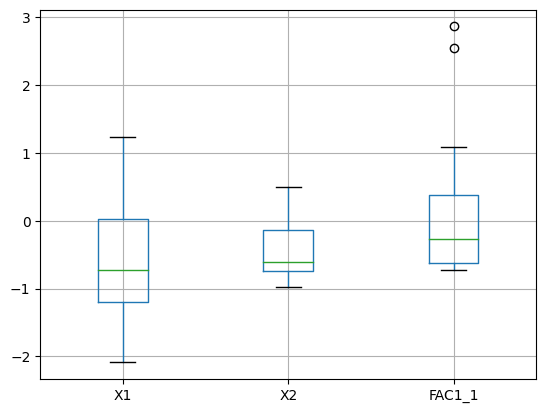

              X1        X2    FAC1_1
X1      1.000000 -0.656998  0.892457
X2     -0.656998  1.000000 -0.502164
FAC1_1  0.892457 -0.502164  1.000000


In [166]:
#数据描述
print(new_adv_data.describe())
#缺失值检验
# print(new_adv_data[new_adv_data.isnull()==True].count())
 
new_adv_data.boxplot()
plt.savefig("boxplot.jpg")
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print(new_adv_data.corr())

d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


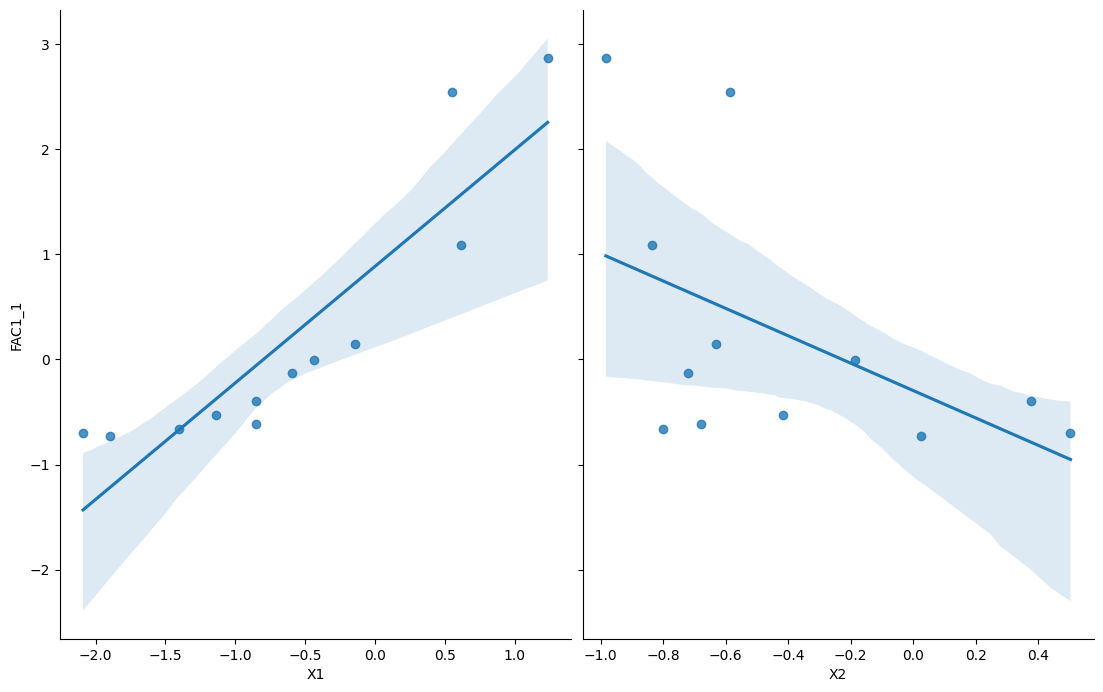

In [167]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(new_adv_data, x_vars=['X1','X2'], y_vars='FAC1_1', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:2],new_adv_data.FAC1_1,train_size=.80)
 
print("原始数据特征:",new_adv_data.iloc[:,:2].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
 
print("原始数据标签:",new_adv_data.FAC1_1.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (12, 2) ,训练数据特征: (9, 2) ,测试数据特征: (3, 2)
原始数据标签: (12,) ,训练数据标签: (9,) ,测试数据标签: (3,)


In [169]:
model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_#截距
 
b = model.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 0.9613217109423691 ,回归系数： [1.08024933 0.37301191]


d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Editio

In [170]:
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 0.9613217109423691 ,回归系数： [1.08024933 0.37301191]


[-0.20896649  1.93030769 -0.85343614]
平均绝对值误差: 0.5110021887707378
平均平方误差: 0.35787186006678634
中位绝对值误差: 0.4060835102053325
R2得分: 0.868644250713073
0.868644250713073
[1.08024933 0.37301191]


d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Editio

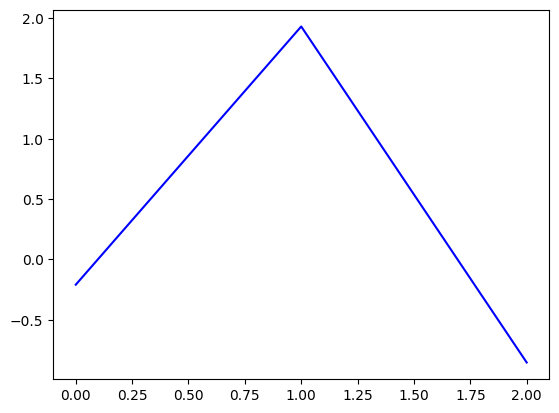

In [171]:
#R方检测
#决定系数r平方
#对于评估模型的精确度
#y误差平方和 = Σ(y实际值 - y预测值)^2
#y的总波动 = Σ(y实际值 - y平均值)^2
#有多少百分比的y波动没有被回归拟合线所描述 = SSE/总波动
#有多少百分比的y波动被回归线描述 = 1 - SSE/总波动 = 决定系数R平方
#对于决定系数R平方来说1） 回归线拟合程度：有多少百分比的y波动刻印有回归线来描述(x的波动变化)
#2）值大小：R平方越高，回归模型越精确(取值范围0~1)，1无误差，0无法完成拟合
score = model.score(X_test,Y_test)
coef = model.coef_
Y_pred = model.predict(X_test)
import sklearn.metrics as sm1
print(Y_pred)

print("平均绝对值误差:", sm1.mean_absolute_error(Y_test, Y_pred))
print("平均平方误差:", sm1.mean_squared_error(Y_test, Y_pred))
print("中位绝对值误差:", sm1.median_absolute_error(Y_test, Y_pred))
print("R2得分:", sm1.r2_score(Y_test,Y_pred ))

print(score)
print(coef)
# print(model.get_params())
#对线性回归进行预测
 

 
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
#显示图像
plt.savefig("predict.jpg")
plt.show()